In [1]:
import pandas as pd
import numpy as np

# Single Customer on the feeder

In [2]:
df = pd.read_csv('../data/customer_base_load_profile.csv')
dfdt = pd.to_datetime(df.pop('Time'))
df['Time'] = dfdt
df.set_index('Time',inplace=True)
df.head()

,S avg(Single Customer),P avg(Single Customer),Q avg(Single Customer)
Time,,,
2023-05-12 00:00:00,13.062560,12.979150,1.434199
2023-05-12 00:15:00,12.815461,12.734077,1.404977
2023-05-12 00:30:00,12.600028,12.518345,1.394997
2023-05-12 00:45:00,12.396598,12.315946,1.371906
2023-05-12 01:00:00,12.173690,12.093541,1.352176


In [3]:
downsampled_cbl = df.resample('5T').interpolate(method='linear')

In [4]:
downsampled_cbl.to_csv('../data/downsampled_cbl.csv')

In [5]:
bload_aggs = pd.read_csv('../data/mod_bload_agg.csv')
bload_aggs.head()

,Idx,base_load_agg,base_load
0,1,12.979150,12.979150
1,2,12.897459,12.897459
2,3,12.815768,12.815768
3,4,12.734077,12.734077
4,5,12.662166,12.662166


<AxesSubplot: xlabel='Idx'>

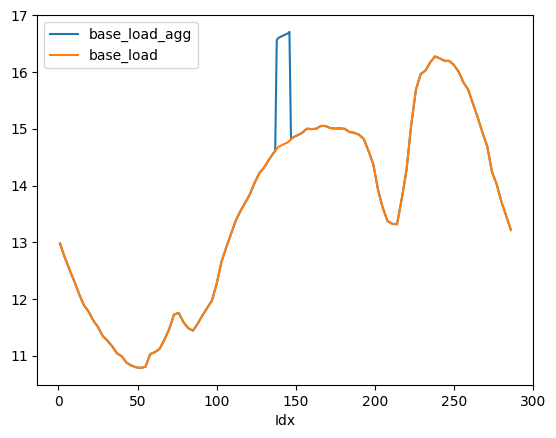

In [6]:
bload_aggs.plot(x='Idx')

# Full Distribution System Downsampling

In [7]:
customer_utilization = pd.read_csv('../data/customer_power_utilization_dummy_data.csv')
customer_utilization.head()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P211,P212,P213,P214,P215,P216,P217,P218,P219,P220
0,12:00:00 AM,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,...,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150
1,12:15:00 AM,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,...,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077
2,12:30:00 AM,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,...,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345,12.518345
3,12:45:00 AM,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,...,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946,12.315946
4,1:00:00 AM,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,...,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541,12.093541


In [8]:
cutil_dt = customer_utilization.pop('Time')
cutil_dt = pd.to_datetime(cutil_dt)
customer_utilization['Time'] = cutil_dt
customer_utilization.set_index('Time',inplace=True)
customer_utilization.to_csv('../data/customer_utilization_xformed.csv')

In [9]:
customer_utilization_hres =  customer_utilization.resample('5T').interpolate(method='linear')

In [10]:
customer_utilization_hres.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P211,P212,P213,P214,P215,P216,P217,P218,P219,P220
Time,,,,,,,,,,,,,,,,,,,,,
2023-05-12 00:00:00,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,...,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150,12.979150
2023-05-12 00:05:00,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,...,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459,12.897459
2023-05-12 00:10:00,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,...,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768,12.815768
2023-05-12 00:15:00,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,...,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077,12.734077
2023-05-12 00:20:00,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,...,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166,12.662166


In [6]:
customer_utilization_hres.to_csv('../data/customer_utilization_hres.csv')

# Downsampling full dataset

This data contains P and Q values over the feeder. For the case of close delta customers, it also contains 'R' and 'B' data appended to their base value.

In [38]:
full_data_set = pd.read_excel('../data/Highest Balanced Load.xlsx').transpose()
full_data_set.columns = full_data_set.iloc[0]
full_data_set = full_data_set.tail(-1)
index_dt = pd.to_datetime(full_data_set.index)
#full_data_set.set_index('Time',inplace=True)
full_data_set.reset_index(inplace=True)
full_data_set.rename_axis('x')
full_data_set.set_index(index_dt,inplace=True)
full_data_set.drop('index',axis=1,inplace=True)
full_data_set.head()


Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Q198R,Q198B,Q202R,Q202B,Q207R,Q207B,Q212R,Q212B,Q215R,Q215B
2023-05-22 00:00:00,13.612602,4.450274,13.612602,6.125671,13.612602,5.933698,6.806301,2.966849,9.528821,20.418903,...,2.556024,2.556024,1.704016,1.704016,1.704016,1.704016,1.704016,1.704016,1.278012,1.278012
2023-05-22 00:15:00,13.424385,4.388741,13.424385,6.040973,13.424385,5.851655,6.712193,2.925828,9.39707,20.136578,...,2.593936,2.593936,1.72929,1.72929,1.72929,1.72929,1.72929,1.72929,1.296968,1.296968
2023-05-22 00:30:00,13.332739,4.35878,13.332739,5.999732,13.332739,5.811707,6.666369,2.905853,9.332917,19.999108,...,2.683709,2.683709,1.789139,1.789139,1.789139,1.789139,1.789139,1.789139,1.341854,1.341854
2023-05-22 00:45:00,12.935099,4.228782,12.935099,5.820795,12.935099,5.638377,6.46755,2.819188,9.05457,19.402649,...,2.453798,2.453798,1.635866,1.635866,1.635866,1.635866,1.635866,1.635866,1.226899,1.226899
2023-05-22 01:00:00,12.960416,4.237059,12.960416,5.832187,12.960416,5.649412,6.480208,2.824706,9.072291,19.440624,...,2.734222,2.734222,1.822815,1.822815,1.822815,1.822815,1.822815,1.822815,1.367111,1.367111


In [40]:
full_data_set = full_data_set.astype(float)
full_data_set_hres =  full_data_set.resample('5T').interpolate(method='linear')
full_data_set_hres.head()

Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Q198R,Q198B,Q202R,Q202B,Q207R,Q207B,Q212R,Q212B,Q215R,Q215B
2023-05-22 00:00:00,13.612602,4.450274,13.612602,6.125671,13.612602,5.933698,6.806301,2.966849,9.528821,20.418903,...,2.556024,2.556024,1.704016,1.704016,1.704016,1.704016,1.704016,1.704016,1.278012,1.278012
2023-05-22 00:05:00,13.549863,4.429763,13.549863,6.097438,13.549863,5.906350,6.774931,2.953175,9.484904,20.324794,...,2.568661,2.568661,1.712441,1.712441,1.712441,1.712441,1.712441,1.712441,1.284331,1.284331
2023-05-22 00:10:00,13.487124,4.409252,13.487124,6.069206,13.487124,5.879003,6.743562,2.939501,9.440987,20.230686,...,2.581298,2.581298,1.720866,1.720866,1.720866,1.720866,1.720866,1.720866,1.290649,1.290649
2023-05-22 00:15:00,13.424385,4.388741,13.424385,6.040973,13.424385,5.851655,6.712193,2.925828,9.397070,20.136578,...,2.593936,2.593936,1.729290,1.729290,1.729290,1.729290,1.729290,1.729290,1.296968,1.296968
2023-05-22 00:20:00,13.393836,4.378754,13.393836,6.027226,13.393836,5.838339,6.696918,2.919169,9.375685,20.090754,...,2.623860,2.623860,1.749240,1.749240,1.749240,1.749240,1.749240,1.749240,1.311930,1.311930


In [41]:
full_data_set_hres.to_csv('../data/full_load_data_hres.csv')